# Análisis descriptivo de base de datos

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('automobile.csv')
df = df[df.precio.apply(lambda x: x.isnumeric())]
df

,Simbolo_riesgo,Fabricante,tipo_combustible,Aspiración,Num_Puertas,Estilo_chasis,Tracción,Lugar_motor,Base_Llanta,longitud,...,tipo_motor,Num_Cilindros,tamano_Motor,Sistema_Combustible,tasa_Comrpesion,Caballos_poder,Limite_RPM,mpg_ciudad,mpg_viaje,precio
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,9.00,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,9.00,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,9.00,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,10.00,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,8.00,115,5500,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,ohc,five,136,mpfi,8.50,110,5500,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,ohc,five,136,mpfi,8.50,110,5500,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,ohc,five,136,mpfi,8.50,110,5500,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,ohc,five,131,mpfi,8.30,140,5500,17,20,23875
9,2,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,ohc,four,108,mpfi,8.80,101,5800,23,29,16430


# Markdown here

In [62]:
df.describe()

,Simbolo_riesgo,Base_Llanta,longitud,ancho,peso,tamano_Motor,tasa_Comrpesion,Caballos_poder,Limite_RPM,mpg_ciudad,mpg_viaje
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.836735,98.903571,174.387245,65.918367,53.786224,127.331633,10.131735,103.887755,5118.112245,25.040816,30.515306
std,1.262426,6.080362,12.175237,2.083161,2.451805,41.752472,3.947926,37.523841,482.266027,6.260857,6.662930
min,-2.000000,86.600000,144.600000,61.800000,47.800000,70.000000,7.000000,52.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.175000,52.000000,97.750000,8.575000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,119.500000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.775000,66.900000,55.625000,145.250000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,326.000000,23.000000,262.000000,6600.000000,49.000000,54.000000


# Número de carros por marca

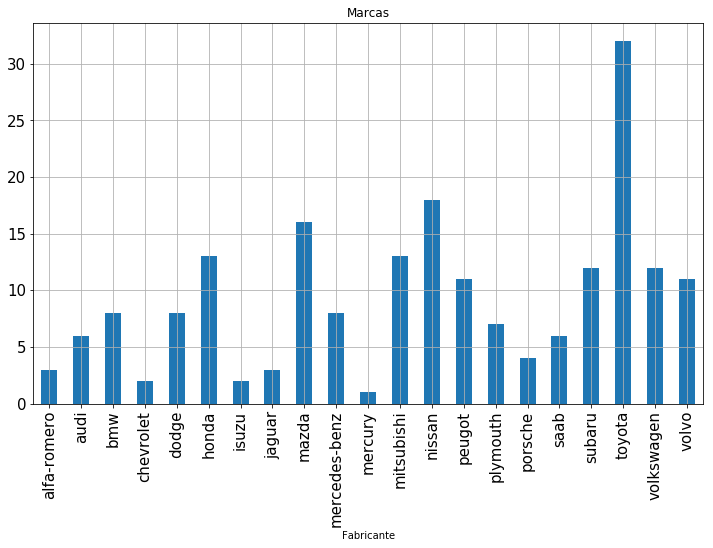

In [63]:
marcas = df.groupby('Fabricante').size()
marcas.plot.bar(figsize=(12,7), title='Marcas', fontsize=15, grid=True, Label='Marcas')

Se puede observar que la mayor cantidad de carros que se tienen registrados son de Toyota, Nissan y Mazda. Los menos registrados son Mercury, Isuzu y Chevrolet

In [64]:
df['Fabricante'].value_counts()

toyota           32
nissan           18
mazda            16
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
mercedes-benz     8
dodge             8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         2
isuzu             2
mercury           1
Name: Fabricante, dtype: int64

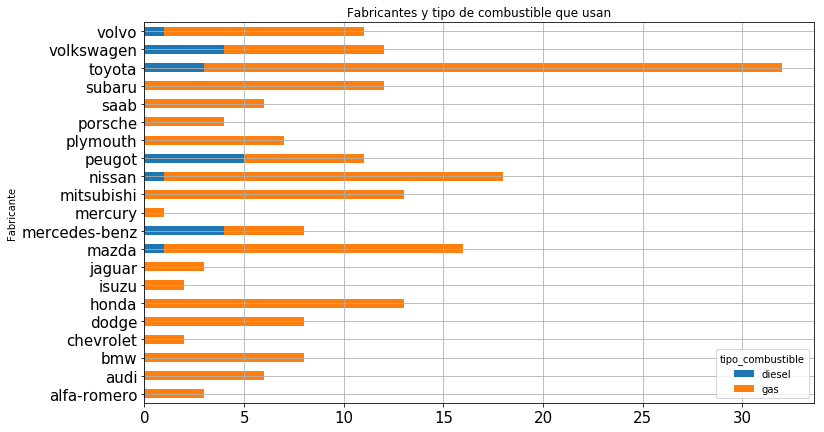

In [65]:
marcas_fuel = pd.crosstab(df.Fabricante, df.tipo_combustible)
marcas_fuel.plot.barh(figsize=(12,7), title='Fabricantes y tipo de combustible que usan', fontsize=15, grid=True, stacked=True)
xlabel : str

plt.show()

En la gran mayoria de las compañias se utiliza gas como fuente de combustible princiapl, con la excepcion de unas cuantas marcas. Las marcas que utilizan diesel en algunos de sus modelos son Peugot, Volkswagen, Mercedes-benz y Toyota

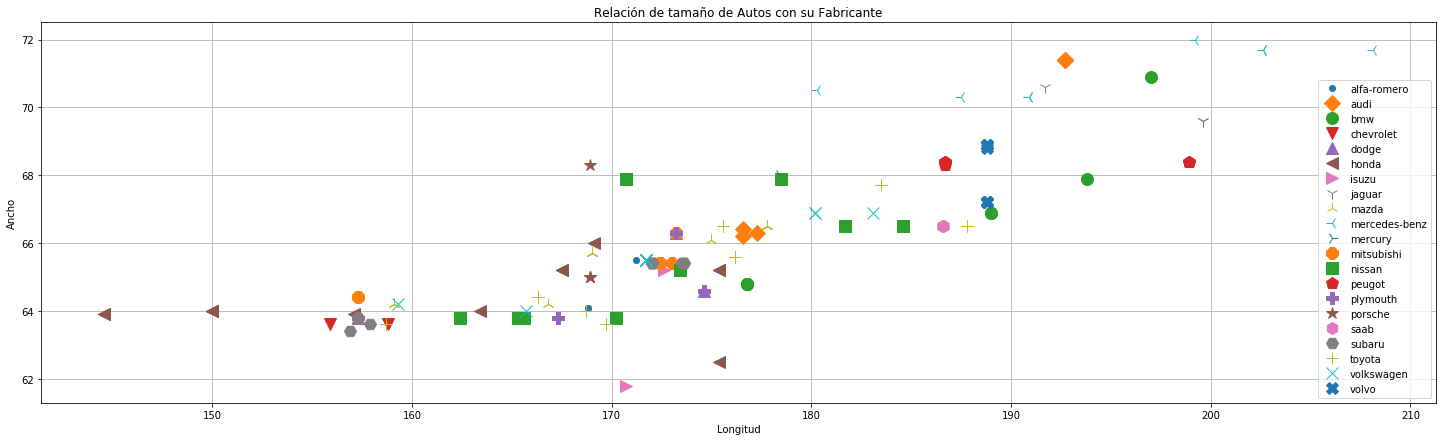

In [66]:
marcas = df.groupby('Fabricante')

fig, ax = plt.subplots(figsize=(25,7))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
symbols = [".","D","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","_","d","|","."]
i = 0
for name, group in marcas:
    ax.plot(group.longitud, group.ancho, marker=symbols[i], linestyle='', ms=12, label=name)
    i+=1
ax.legend()
ax.grid()
ax.set_xlabel('Longitud')
ax.set_ylabel('Ancho')

ax.set_title('Relación de tamaño de Autos con su Fabricante')
plt.show()


Podemos observar que la marcas que tienden a hacer autos marcas pequeñas son Subaru y Honda. Las marcas que tienden hacer autos mas grandes son Mercedes-benz, Volvo, Peugot y BMW. Las marcas que hacen autos de tamaño mediano son Audi, Mitsubishi, Nissan, Toyota y Porsche

In [67]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Simbolo_riesgo,Base_Llanta,longitud,ancho,peso,tamano_Motor,tasa_Comrpesion,Caballos_poder,Limite_RPM,mpg_ciudad,mpg_viaje
Simbolo_riesgo,1,-0.535926,-0.361205,-0.235585,-0.547313,-0.104821,-0.175912,0.0803701,0.279054,-0.0471654,0.0277337
Base_Llanta,-0.535926,1,0.879008,0.814151,0.59409,0.566019,0.254023,0.364957,-0.362372,-0.465497,-0.539068
longitud,-0.361205,0.879008,1,0.851098,0.495991,0.680143,0.158092,0.579776,-0.287764,-0.661966,-0.697658
ancho,-0.235585,0.814151,0.851098,1,0.306547,0.725355,0.190178,0.614527,-0.247162,-0.626655,-0.677108
peso,-0.547313,0.59409,0.495991,0.306547,1,0.0704639,0.252438,-0.0869445,-0.305896,-0.0568564,-0.112259
tamano_Motor,-0.104821,0.566019,0.680143,0.725355,0.0704639,1,0.0287033,0.823198,-0.257859,-0.651911,-0.681438
tasa_Comrpesion,-0.175912,0.254023,0.158092,0.190178,0.252438,0.0287033,1,-0.206359,-0.431039,0.326506,0.260572
Caballos_poder,0.0803701,0.364957,0.579776,0.614527,-0.0869445,0.823198,-0.206359,1,0.103873,-0.825491,-0.805697
Limite_RPM,0.279054,-0.362372,-0.287764,-0.247162,-0.305896,-0.257859,-0.431039,0.103873,1,-0.110304,-0.0514357
mpg_ciudad,-0.0471654,-0.465497,-0.661966,-0.626655,-0.0568564,-0.651911,0.326506,-0.825491,-0.110304,1,0.970782


## Correlación de variables numéricas

En la visualización anterior se pueden identificar las variables con mayor correlación. De entre las identificadas destacan la longitud y el ancho, que también inluyen el tamaño de la llanta y del motor. 
De la misma forma, se identifican relaciones de correlación inversa, como entre los caballos de poder y el rendimiento en millas por galón; lo que da a entender que el aumento de la potencia diminuye el ahorro de combustible.

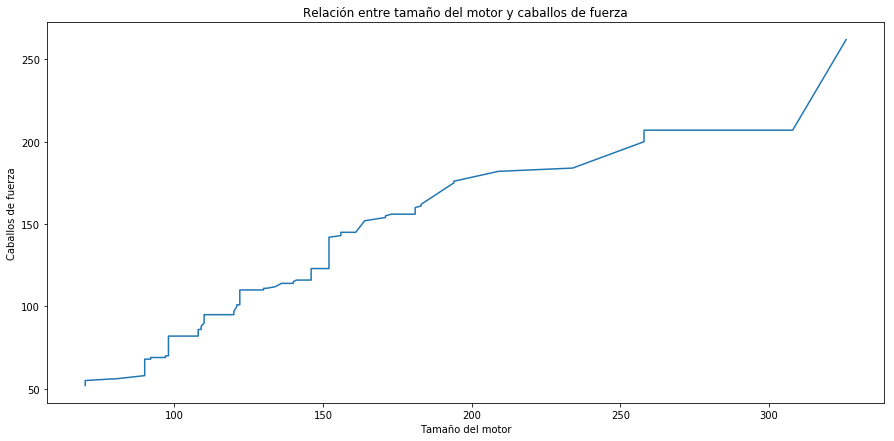

In [68]:
poder = df.sort_values(by=['Caballos_poder'])
poder = poder['Caballos_poder']
motor = df.sort_values(by=['tamano_Motor'])
motor = motor['tamano_Motor']
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(motor,poder)
ax.set(xlabel='Tamaño del motor', ylabel='Caballos de fuerza', title='Relación entre tamaño del motor y caballos de fuerza')
plt.show()

Podemos ver que en gran parte de los casos, al tener un motor mas grande se tiene mas caballos de fuerza. Con la expcion del rango entre 240 y 300, donde no varia mucho los caballos de fuerza.

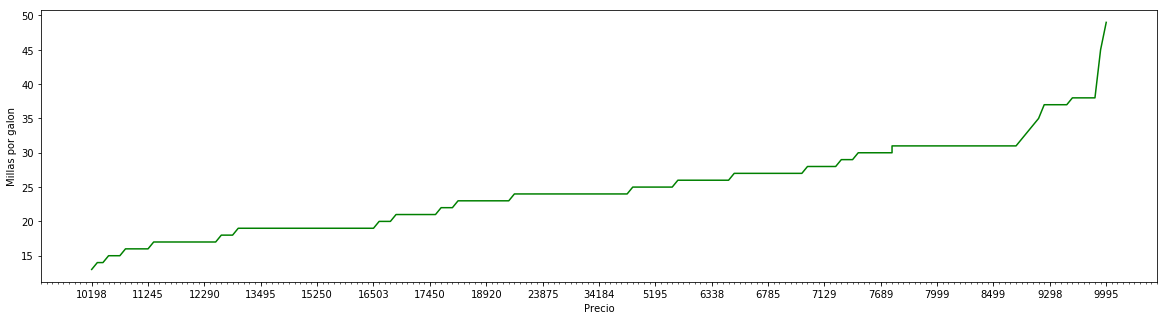

In [69]:
import matplotlib.ticker as ticker

precios = df.sort_values(by=['precio'])
precios = precios['precio']
mpgC = df.sort_values(by=['mpg_ciudad'])
mpgC = mpgC['mpg_ciudad']
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(precios,mpgC,color='green')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set(xlabel='Precio',ylabel='Millas por galon')
plt.show()

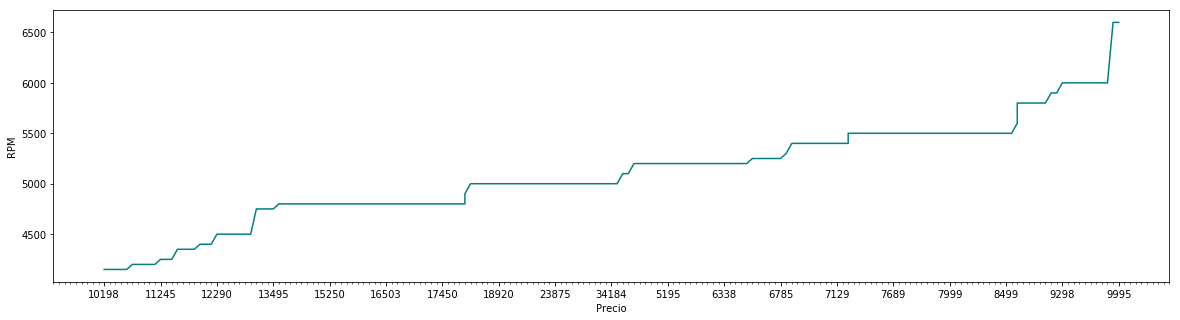

In [77]:
import matplotlib.ticker as ticker

precios = df.sort_values(by=['precio'])
precios = precios['precio']
rpm = df.sort_values(by=['Limite_RPM'])
rpm = rpm['Limite_RPM']
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(precios,rpm,color='teal')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set(xlabel='Precio',ylabel='RPM')
plt.show()

Se realiza el mismo análisis en relación del precio con las reovoluciones por minuto, y se consigue una proyección semejante a la de las millas por galon. Se identifica que con el aumento del precio se obtiene un mayor rendimeinto del motor.